In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [43]:
Nclass = 500
D = 2 #Inputs
M = 3 #Hidden nodes
K = 3 #Outputs (3 classes)
X1 = np.random.randn(Nclass,D) + np.array([0,-2]) # mean = 0  ; variance = 2
X2 = np.random.randn(Nclass,D) + np.array([2,2])
X3 = np.random.randn(Nclass,D) + np.array([-2,2])
X = np.concatenate((X1,X2,X3),axis=0)  # Input
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass) #1500 values (Targets)

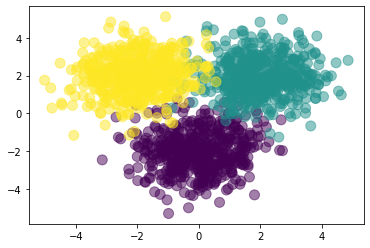

In [44]:
plt.scatter(X[:,0],X[:,1],c=Y,s=100,alpha=0.5)
plt.show()

In [45]:
N = len(Y)
T = np.zeros((N,K))
for i in range(N): # One hot encoding
    T[i,Y[i]]=1

In [46]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))

In [47]:
def forward(X,W1,b1,W2,b2):
    Z = tf.nn.sigmoid(tf.matmul(X,W1)+b1)
    return tf.matmul(Z,W2)+b2
    

In [48]:
tfX = tf.placeholder(tf.float32, [None,D])
tfY = tf.placeholder(tf.float32, [None,K])

In [49]:
W1 = init_weights([D,M])
b1 = init_weights([M])
W2 = init_weights([M,K])
b2 = init_weights([K])

In [50]:
py_x = forward(tfX,W1,b1,W2,b2)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = py_x,labels = tfY))

In [51]:
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
predict_op = tf.argmax(py_x,1) #axis=1

In [57]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for i in range(1000):
    sess.run(train_op, feed_dict={tfX:X, tfY:T})
    pred = sess.run(predict_op, feed_dict={tfX:X})
    if i%10==0:
        print(np.mean(Y == pred))

0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.53
0.4673333333333333
0.336
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3353333333333333
0.3393333333333333
0.3546666666666667
0.378
0.418
0.46066666666666667
0.5026666666666667
0.5446666666666666
0.5753333333333334
0.6
0.6186666666666667
0.6486666666666666
0.6806666666666666
0.718
0.748
0.78
0.81
0.838
0.8613333333333333
0.8826666666666667
0.896
0.9066666666666666
0.9186666666666666
0.9253333333333333
0.9313333333333333
0.936
0.938
0.94
0.9413333333333334
0.9433333333333334
0.9433333333333334
0.9433333333333334
0.9433333333333334
0.9466666666666667
0.9473333333333334
0.9486666666666667
0.95
0.9513333333333334
0.9506666666666667
0.9506666666666667
0.952
0.9526666666666667
0.952
0.9526666666666667
0.9533333333333334
0.9553333333333334
0.9566666666666667
0.9566666666666667
0.9566666666666667
0.956666666